In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt 


In [108]:
import warnings
warnings.simplefilter(action='ignore')

In [109]:
loan_default=pd.read_csv(r'https://raw.githubusercontent.com/mojisolasusan/Loan-Default-App/main/Loan_default.csv')

In [110]:
loan_default.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [111]:
loan_default.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Age,255347.0,43.498306,14.990258,18.0,31.00,43.00,56.00,69.0
Income,255347.0,82499.304597,38963.013729,15000.0,48825.50,82466.00,116219.00,149999.0
LoanAmount,255347.0,127578.865512,70840.706142,5000.0,66156.00,127556.00,188985.00,249999.0
CreditScore,255347.0,574.264346,158.903867,300.0,437.00,574.00,712.00,849.0
MonthsEmployed,255347.0,59.541976,34.643376,0.0,30.00,60.00,90.00,119.0
NumCreditLines,255347.0,2.501036,1.117018,1.0,2.00,2.00,3.00,4.0
InterestRate,255347.0,13.492773,6.636443,2.0,7.77,13.46,19.25,25.0
LoanTerm,255347.0,36.025894,16.969330,12.0,24.00,36.00,48.00,60.0
DTIRatio,255347.0,0.500212,0.230917,0.1,0.30,0.50,0.70,0.9
Default,255347.0,0.116128,0.320379,0.0,0.00,0.00,0.00,1.0


In [112]:
loan_default.shape

(255347, 18)

In [113]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [114]:
loan_default.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

## Data Exploration

In [115]:
loan_default.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


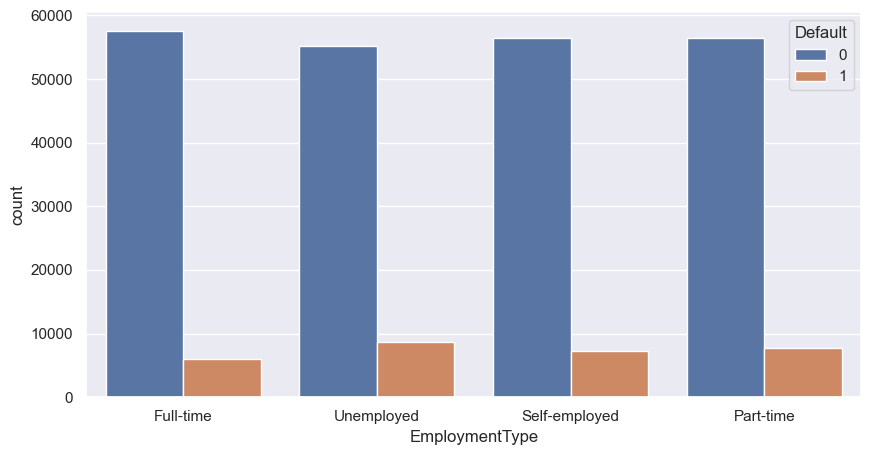

In [116]:
### plot graph between default rate and employement type

plt.figure(
    figsize=(10,5)
)
sns.countplot(x='EmploymentType',hue='Default', data = loan_default);

In [117]:
loan_default.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [118]:
loan_default.head(10)

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
5,A9S62RQ7US,25,90298,90448,720,18,2,22.72,24,0.10,High School,Unemployed,Single,Yes,No,Business,Yes,1
6,H8GXPAOS71,38,111188,177025,429,80,1,19.11,12,0.16,Bachelor's,Unemployed,Single,Yes,No,Home,Yes,0
7,0HGZQKJ36W,56,126802,155511,531,67,4,8.15,60,0.43,PhD,Full-time,Married,No,No,Home,Yes,0
8,1R0N3LGNRJ,36,42053,92357,827,83,1,23.94,48,0.20,Bachelor's,Self-employed,Divorced,Yes,No,Education,No,1
9,CM9L1GTT2P,40,132784,228510,480,114,4,9.09,48,0.33,High School,Self-employed,Married,Yes,No,Other,Yes,0


In [119]:
loan_default.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

### Data Processing

In [120]:
from sklearn.model_selection import train_test_split # this is for spliting the model into train and test
from sklearn.linear_model import LinearRegression # this is for buliding the model
from sklearn.metrics import mean_absolute_error ## this is for evaluating the model
from sklearn.metrics import mean_squared_error ## this is also for evaluation
from sklearn.preprocessing import StandardScaler # this is used to fit and transform our data
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score,recall_score, f1_score
from sklearn.preprocessing import LabelEncoder


In [121]:
loan_default=loan_default.drop('LoanID',axis='columns')

In [122]:
for col in loan_default:
    if loan_default[col].dtype=='object':
        print(f"{col}: {loan_default[col].unique()}")

Education: ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus: ['Divorced' 'Married' 'Single']
HasMortgage: ['Yes' 'No']
HasDependents: ['Yes' 'No']
LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']
HasCoSigner: ['Yes' 'No']


In [123]:
for column in loan_default:
    if loan_default[column].dtype == 'object' and set(loan_default[column].unique()) == {'Yes', 'No'}:
        loan_default[column] = loan_default[column].map({'Yes': 1, 'No': 0})

In [124]:
for column in loan_default:
    if loan_default[column].dtype=='object':
        print(f'{column}: {loan_default[column].unique()}')

Education: ["Bachelor's" "Master's" 'High School' 'PhD']
EmploymentType: ['Full-time' 'Unemployed' 'Self-employed' 'Part-time']
MaritalStatus: ['Divorced' 'Married' 'Single']
LoanPurpose: ['Other' 'Auto' 'Business' 'Home' 'Education']


In [125]:
## Encode Categorical columns

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

loan_default['Education_n']      = le.fit_transform(loan_default['Education'])
loan_default['EmploymentType_n'] = le.fit_transform(loan_default['EmploymentType'])
loan_default['MaritalStatus_n']  = le.fit_transform(loan_default['MaritalStatus'])
loan_default['LoanPurpose_n']    = le.fit_transform(loan_default['LoanPurpose'])

In [126]:
## spliting X anf y into features and Target(label)

X=loan_default.drop(['Education','EmploymentType','MaritalStatus','LoanPurpose','Default'],axis =1)

pd.set_option('display.max_columns', None) # to display all the data

In [127]:
X.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,HasMortgage,HasDependents,HasCoSigner,Education_n,EmploymentType_n,MaritalStatus_n,LoanPurpose_n
0,56,85994,50587,520,80,4,15.23,36,0.44,1,1,1,0,0,0,4
1,69,50432,124440,458,15,1,4.81,60,0.68,0,0,1,2,0,1,4
2,46,84208,129188,451,26,3,21.17,24,0.31,1,1,0,2,3,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,0,0,1,0,1,1
4,60,20437,9139,633,8,4,6.51,48,0.73,0,1,0,0,3,0,0


In [128]:
y=loan_default["Default"]

In [129]:
y.head(10)

0    0
1    0
2    1
3    0
4    0
5    1
6    0
7    0
8    1
9    0
Name: Default, dtype: int64

In [130]:

# scale the  data
scaler=StandardScaler()

In [131]:

columns = ['InterestRate', 'DTIRatio','Age','Income','LoanAmount','CreditScore','MonthsEmployed','NumCreditLines']
loan_default[columns] = scaler.fit_transform(loan_default[columns])

In [132]:
# the version of scikit learn was downgraded in the terminal in order to install imbearn 

## oversampling and undersampling

In [133]:
from imblearn.under_sampling import RandomUnderSampler

In [134]:
under_sampler=RandomUnderSampler(sampling_strategy=0.4,random_state=42)
X,y=under_sampler.fit_resample(X,y)

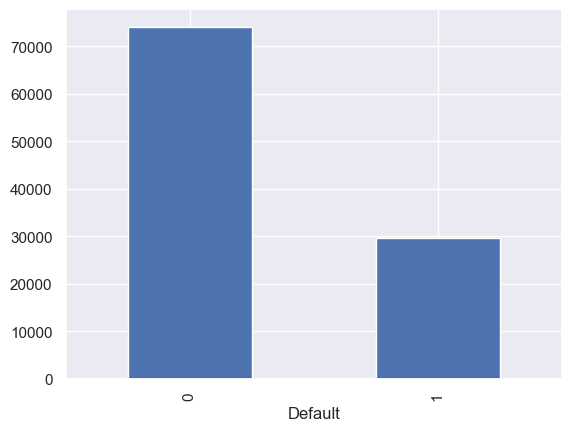

In [135]:
y.value_counts().plot(
   kind='bar');

In [136]:
# because undersampling may cause us to loose data, we need to oversample the data inorder to be at a balanced rate

In [137]:
from imblearn.over_sampling import SMOTE

In [138]:
smote=SMOTE(sampling_strategy ='auto',random_state=42)
X,y=smote.fit_resample(X,y)

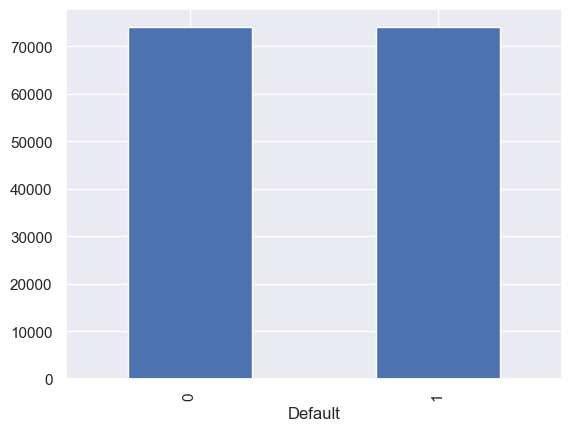

In [139]:
y.value_counts().plot(
    kind='bar');

## Tensorflow

In [140]:
import tensorflow

In [141]:
from keras.models import Sequential

In [142]:
from keras.layers import Dense,Dropout

In [143]:
## spliting the dataset using train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [144]:
X_train.shape

(118611, 16)

In [145]:
X_test.shape

(29653, 16)

In [146]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [147]:
model=Sequential()

model.add(Dense(units=13,activation='relu'))

model.add(Dense(units=6,activation='relu'))

model.add(Dense(units=1,activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam')

In [148]:
from keras.callbacks import EarlyStopping

In [149]:
early_stop=EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=5) ## this is to monitor our loss to the minimum

In [150]:
model.fit(X_train,y_train,epochs=70,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/70
3707/3707 [==============================] - 15s 4ms/step - loss: 0.5450 - val_loss: 0.5262
Epoch 2/70
3707/3707 [==============================] - 14s 4ms/step - loss: 0.5266 - val_loss: 0.5221
Epoch 3/70
3707/3707 [==============================] - 13s 3ms/step - loss: 0.5238 - val_loss: 0.5177
Epoch 4/70
3707/3707 [==============================] - 11s 3ms/step - loss: 0.5203 - val_loss: 0.5136
Epoch 5/70
3707/3707 [==============================] - 10s 3ms/step - loss: 0.5163 - val_loss: 0.5107
Epoch 6/70
3707/3707 [==============================] - 12s 3ms/step - loss: 0.5134 - val_loss: 0.5123
Epoch 7/70
3707/3707 [==============================] - 11s 3ms/step - loss: 0.5113 - val_loss: 0.5080
Epoch 8/70
3707/3707 [==============================] - 12s 3ms/step - loss: 0.5103 - val_loss: 0.5055
Epoch 9/70
3707/3707 [==============================] - 10s 3ms/step - loss: 0.5091 - val_loss: 0.5060
Epoch 10/70
3707/3707 [==============================] - 10s 3ms/step - l

<Axes: >

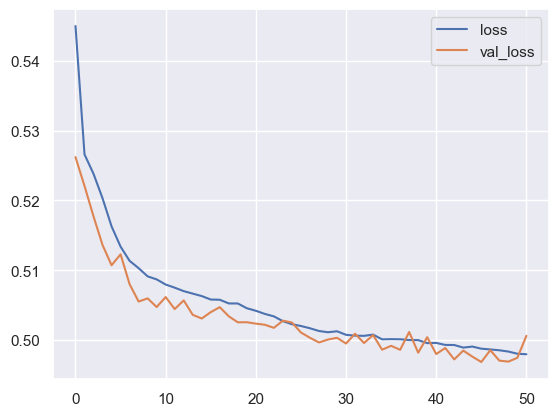

In [151]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [152]:
from keras.layers import Dropout

In [153]:
model=Sequential()

model.add(Dense(units=13,activation='relu'))
dropout_rate = 0.02
model.add(Dropout(dropout_rate))

model.add(Dense(units=6,activation='relu'))
dropout_rate = 0.02
model.add(Dropout(dropout_rate))
       
model.add(Dense(units=1,activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer='adam')

In [154]:
model.fit(X_train,y_train,epochs=70,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/70
3707/3707 [==============================] - 12s 3ms/step - loss: 0.5486 - val_loss: 0.5225
Epoch 2/70
3707/3707 [==============================] - 10s 3ms/step - loss: 0.5280 - val_loss: 0.5157
Epoch 3/70
3707/3707 [==============================] - 11s 3ms/step - loss: 0.5221 - val_loss: 0.5119
Epoch 4/70
3707/3707 [==============================] - 11s 3ms/step - loss: 0.5185 - val_loss: 0.5137
Epoch 5/70
3707/3707 [==============================] - 11s 3ms/step - loss: 0.5162 - val_loss: 0.5118
Epoch 6/70
3707/3707 [==============================] - 11s 3ms/step - loss: 0.5144 - val_loss: 0.5106
Epoch 7/70
3707/3707 [==============================] - 11s 3ms/step - loss: 0.5121 - val_loss: 0.5065
Epoch 8/70
3707/3707 [==============================] - 11s 3ms/step - loss: 0.5116 - val_loss: 0.5042
Epoch 9/70
3707/3707 [==============================] - 11s 3ms/step - loss: 0.5109 - val_loss: 0.5051
Epoch 10/70
3707/3707 [==============================] - 11s 3ms/step - l

<Axes: >

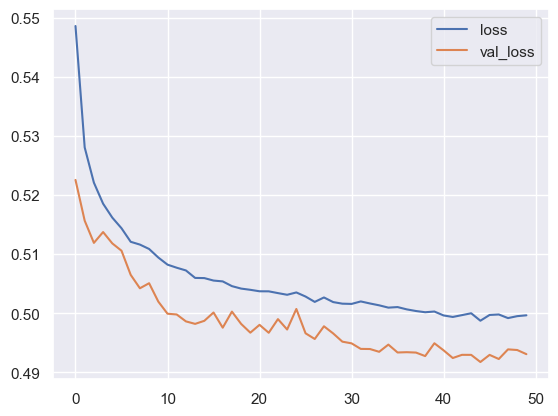

In [155]:
model_loss=pd.DataFrame(model.history.history)
model_loss.plot()

In [156]:
y_pred=(model.predict(X_test)>0.5).astype(np.int64)

927/927 [==============================] - 2s 2ms/step


In [157]:
y_pred

array([[0],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]], dtype=int64)

In [158]:
from sklearn.metrics import classification_report, confusion_matrix

In [159]:
print(' The classification report is')
print(classification_report(y_test,y_pred))
print('The confusion matrix is')
print(confusion_matrix(y_test,y_pred))

 The classification report is
              precision    recall  f1-score   support

           0       0.74      0.79      0.77     14799
           1       0.78      0.72      0.75     14854

    accuracy                           0.76     29653
   macro avg       0.76      0.76      0.76     29653
weighted avg       0.76      0.76      0.76     29653

The confusion matrix is
[[11762  3037]
 [ 4131 10723]]


## saving the model

In [162]:
import joblib

In [164]:
joblib.dump(model,'Loan_Default_App.joblib')

['Loan_Default_App.joblib']